# Heart Disease - Naive Bayes Classifier
With the attributes described, can you predict if a patient has heart disease?

There are 13 attributes

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
condition: 0 = no disease, 1 = disease


Data obtained from: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?resource=download


## Step 1: Uploading the data and identifying features and labels

In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Uploading the dataset form the csv file
data = pd.read_csv('./datasets/heart/heart_cleveland_upload.csv')
# Our data is distributed in several columns.
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [3]:
# We need to train a model that uses the Naive Bayes Classifier to predict
# for the last column: condition. Therefore, let's split the data into
# features and target label
features = data.iloc[:,:-1]
target = data.iloc[:,-1:]

## Step 2: Splitting the dataset into training and testing set

In [4]:
from sklearn.model_selection import train_test_split

# Fixing the random_state at 42 and using an 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(features, target,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [5]:
# Checking the testing and training sets sizes
print(len(Y_train), len(Y_test))

237 60


In [6]:
type(X_train)

pandas.core.frame.DataFrame

In [7]:
# Although we have only 2 predicted classes, we'll try the MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# We'll start first with a
# smoothing of 1 and we'll set the prior probability to true
clf = MultinomialNB(alpha = 1.0, fit_prior = True)
# np.ravel(Y_train), transforms the shape of the Y_train variable to match the
# expected input format for the fit() method (2-dim to 1-dim)
clf.fit(X_train, np.ravel(Y_train))

MultinomialNB()

## Step 3: Performing predictions on the test dataset

In [8]:
prediction_prob = clf.predict_proba(X_test)
print(prediction_prob[:10])

[[3.24375152e-02 9.67562485e-01]
 [9.30577932e-01 6.94220682e-02]
 [9.27196257e-01 7.28037430e-02]
 [9.99985164e-01 1.48364402e-05]
 [4.68518534e-01 5.31481466e-01]
 [5.54614647e-02 9.44538535e-01]
 [1.10026638e-06 9.99998900e-01]
 [3.70475128e-07 9.99999630e-01]
 [4.12944636e-04 9.99587055e-01]
 [9.99843005e-01 1.56994981e-04]]


In [9]:
prediction = clf.predict(X_test)
print(prediction[:10])

[1 0 0 0 1 1 1 1 1 0]


## Step 4: Evaluating the model's accuracy, precision, recall and F1 score
* We'll use both the individual methods and the confusion matrix

In [10]:
# Reviewing the Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

print(confusion_matrix(Y_test, prediction, labels =[0, 1]))

# Evaluating Accuracy:
accuracy = clf.score(X_test, Y_test)
print(f"The accuracy is: {accuracy * 100:.1f}%")

# Evaluating Precision:
precision = precision_score(Y_test, prediction, pos_label = 1)
print(f"Precision: {precision}")

# Evaluating Recall:
recall = recall_score(Y_test, prediction, pos_label = 1)
print(f"Recall: {recall}")

# F1 score
f1 = f1_score(Y_test, prediction, pos_label = 1)




[[19 13]
 [11 17]]
The accuracy is: 60.0%
Precision: 0.5666666666666667
Recall: 0.6071428571428571


## Getting all metrics as a classification report


In [11]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        32
           1       0.57      0.61      0.59        28

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.60      0.60      0.60        60



## ROC Curves
A plot of the true positive rate versus the false positive rate

In [12]:
# Preparing the data
pos_prob = prediction_prob[:, 1]
tresholds = np.arange(0.0, 1.1, 0.05)
true_pos, false_pos = [0]*len(tresholds),[0]*len(tresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, treshold in enumerate(tresholds):
        if pred >= treshold:
            # If truth and prediction are both 1
            if y == 1:
                true_pos[i] += 1
            # If truth is 0 while prediction is 1
            else:
                false_pos[i] += 1
        else:
            break




In [13]:
# Now calculating the true and false positive rates for all treshold settings
n_pos_test = (Y_test == 1).sum()
n_neg_test = (Y_test == 0).sum()
true_pos_rate = [tp / n_pos_test for tp in true_pos]
false_pos_rate = [fp / n_neg_test for fp in false_pos]


**Important note: The manual calculation did not work (didn't plot the data.
So we'll automate the calculation.**

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, _ =roc_curve(Y_test, pos_prob)


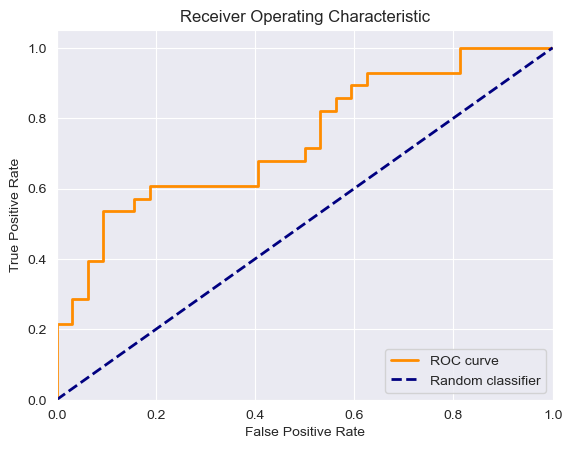

In [15]:
# Plotting the ROC curve with matplotlib
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw=lw)
plt.plot([0, 1], [0,1], color = 'navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(["ROC curve", "Random classifier"], loc="lower right")

plt.show()

In [16]:
# Now calculating the ROC of our model
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(Y_test, pos_prob)
print(f"ROC Score: {roc_score}")

ROC Score: 0.7399553571428571


## Step 5: Fine tunning with Cross-Validation

In [17]:
# Using the split() method from StratisfiedKfold to divide the data into chunks
from sklearn.model_selection import StratifiedKFold

k = 10
k_fold = StratifiedKFold(n_splits = k, random_state = 42, shuffle = True)

In [18]:
# Exploring with different alpha (smoothing) and fit_prior values.
smoothing_factor_option = [1, 2, 3, 4, 5, 6]
fit_prior_option = [True, False]
auc_record = {}


In [19]:
# Using the classifier on each of the k_folds
for train_indices, test_indices in k_fold.split(features, target):
    X_train, X_test = features.iloc[train_indices], features.iloc[test_indices]
    Y_train, Y_test = target.iloc[train_indices], target.iloc[test_indices]
    for alpha in smoothing_factor_option:
        if alpha not in auc_record:
            auc_record[alpha] = {}
        for fit_prior in fit_prior_option:
            clf = MultinomialNB(alpha=alpha, fit_prior = fit_prior)
            clf.fit(X_train, np.ravel(Y_train))
            prediction_prob = clf.predict_proba(X_test)
            pos_prob = prediction_prob[:, 1]
            auc = roc_auc_score(Y_test, pos_prob)
            auc_record[alpha][fit_prior] = auc + auc_record[alpha].get(fit_prior, 0.0)

In [20]:
# Presenting the results
for smoothing, smoothing_record in auc_record.items():
    for fit_prior, auc in smoothing_record.items():
        print(f'    {smoothing}     {fit_prior}     {auc/k:.5f}')


    1     True     0.86212
    1     False     0.86212
    2     True     0.86212
    2     False     0.86212
    3     True     0.86116
    3     False     0.86116
    4     True     0.85883
    4     False     0.85883
    5     True     0.85927
    5     False     0.85927
    6     True     0.85786
    6     False     0.85786


In [31]:
# Retraining the model with the best set of hyperparameters (1, True,  0.86212)
clf = MultinomialNB(alpha = 1, fit_prior = True)
clf.fit(X_train, np.ravel(Y_train))
prediction_multi_best = clf.predict(X_test)
pos_prob = clf.predict_proba(X_test)[:, 1]
print("AUC with the best model: ", roc_auc_score(Y_test, pos_prob))

AUC with the best model:  0.9126794258373205


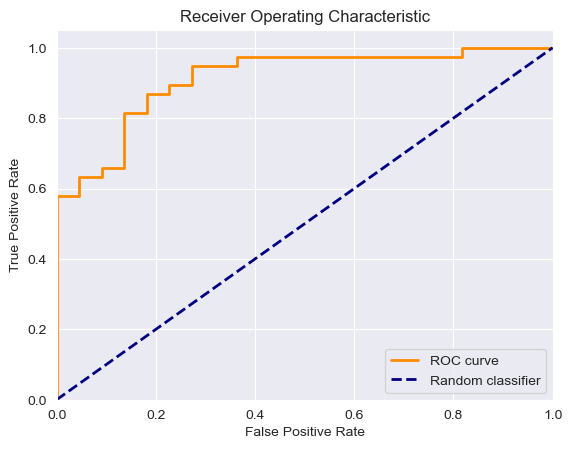

In [32]:
# Now calculating the true and false positive rates for all treshold settings
from sklearn.metrics import roc_curve
fpr, tpr, _ =roc_curve(Y_test, pos_prob)

# Plotting the ROC curve with matplotlib
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange', lw=lw)
plt.plot([0, 1], [0,1], color = 'navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(["ROC curve", "Random classifier"], loc="lower right")

plt.show()

In [33]:
report = classification_report(Y_test, prediction_multi_best)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.91      0.73        22
           1       0.93      0.66      0.77        38

    accuracy                           0.75        60
   macro avg       0.77      0.78      0.75        60
weighted avg       0.81      0.75      0.75        60



In [34]:
confusion_matrix(Y_test, prediction_multi_best)

array([[20,  2],
       [13, 25]], dtype=int64)

# Considering other NB models since the data is mostly continuous/categorical
* It appears that several attributes are categorical. For example, cp,
restecg, slope, and thal are categorical attributes with multiple categories.
* Using one-hot encoding on these categorical attributes would be appropriate.



In [23]:
# Performing one-hot encoding on the categorical columns
one_hot_encoded_data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'])
one_hot_encoded_data

# Splitting the data
features_gnb = one_hot_encoded_data.iloc[:,:-1]
target_gnb = one_hot_encoded_data['condition']



In [24]:
# Retrying without one-hot encoding
features_gnb = data.loc[:, data.columns!='condition']
target_gnb = np.array(data['condition'])

In [25]:
# Fixing the random_state at 0 and using an 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(features_gnb, target_gnb,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, np.ravel(Y_train))

prediction_prob_gaussian = gnb.predict_proba(X_test)
predict_gaussian = gnb.predict(X_test)

In [27]:
report_gaussian = classification_report(Y_test, predict_gaussian)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        32
           1       0.57      0.61      0.59        28

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.60      0.60      0.60        60



## Fine tunning the GaussianNB

In [28]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid:
param_grid = {'var_smoothing': np.logspace(-10, -8, num=50)}

# Create a GridSearchCV object
grid_search = GridSearchCV(gnb, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'var_smoothing': 1e-10}
Best accuracy:  0.8437943262411347


In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing =  1e-10)
gnb.fit(X_train, np.ravel(Y_train))

prediction_prob_gaussian = gnb.predict_proba(X_test)
predict_gaussian = gnb.predict(X_test)

report_gaussian = classification_report(Y_test, predict_gaussian)
print(report_gaussian)

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        22
           1       0.97      0.76      0.85        38

    accuracy                           0.83        60
   macro avg       0.83      0.86      0.83        60
weighted avg       0.87      0.83      0.84        60



In [30]:
confusion_matrix(Y_test, predict_gaussian)

array([[21,  1],
       [ 9, 29]], dtype=int64)